In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.misc as scm

In [5]:
nTest=30 #試行回数

#枚数
monster=10 #ダブりあり
magic=5 #ダブりあり
trap=5
ur=4
sr=3
r=10 #ダブりあり
n=3

In [22]:
#ur
N=20 #デッキ枚数
M=ur #デッキにあるキーカード枚数
n=4 #初期手札の枚数
x=0 #初期手札に入ったキーカード枚数

#p0=scm.comb(N-M,n)/scm.comb(N,n)
#print('ur%d枚 %f' %(x, p0))

p=[]
p.append(scm.comb(N-M,n)/scm.comb(N,n))
print(p)

for x in range(1,n+1):
    p.append(scm.comb(M,x)*scm.comb(N-M,n-x)/scm.comb(N,n))

for x in range(0,len(p)):
    print('ur%d枚 %f' %(x, p[x]))

ur0枚 0.375645
[0.37564499484004127]
ur0枚 0.375645
ur1枚 0.462332
ur2枚 0.148607
ur3枚 0.013209
ur4枚 0.000206


In [ ]:
#二項検定
success=11 #成功数
Pb=0
Pa=0
#下側
for i in range(0,success+1):
    Pb += scm.comb(n,i)*pow(p,i)*pow(1-p,n-i)
#上側
for i in range(success,n+1):
    Pa += scm.comb(n,i)*pow(p,i)*pow(1-p,n-i)
print(Pb)
print(Pa)
print(Pb+Pa)
print('-----')

#二項検定
success=2 #成功数
Pb=0
Pa=0
#下側
for i in range(0,success+1):
    Pb += scm.comb(n,i)*pow(p,i)*pow(1-p,n-i)
#上側
for i in range(success,n+1):
    Pa += scm.comb(n,i)*pow(p,i)*pow(1-p,n-i)
print(Pb)
print(Pa)
print(Pb+Pa)
print('-----')

#二項検定
success=4 #成功数
Pb=0
Pa=0
#下側
for i in range(0,success+1):
    Pb += scm.comb(n,i)*pow(p,i)*pow(1-p,n-i)
#上側
for i in range(success,n+1):
    Pa += scm.comb(n,i)*pow(p,i)*pow(1-p,n-i)
print(Pb)
print(Pa)
print(Pb+Pa)

In [ ]:
#確率
p1=0.2 #デッキに１枚
p2=0.4 #デッキに２枚

#標本数
size=1000

#x1=rd.binomial(n,p1,size)
#x2=rd.binomial(n,p2,size)

#print(max(x1))
#print(max(x2))
#min(x1)

<bound method Figure.show of <matplotlib.figure.Figure object at 0x10eee09e8>>

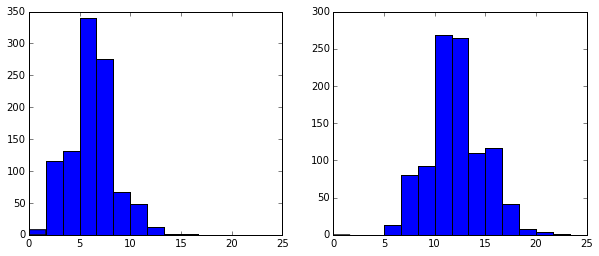

In [107]:
#グラフ描画

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

axL.hist(x1, bins=15, range=(0,25))
axR.hist(x2, bins=15, range=(0,25))

fig.show

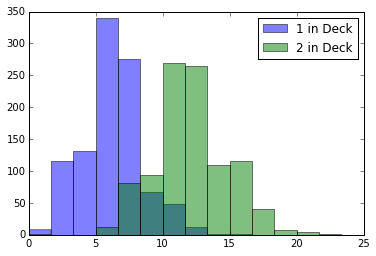

In [108]:
#グラフ描画　重ねる
plt.hist(x1, label='1 in Deck', bins=15, range=(0,25), alpha=0.5)
plt.hist(x2, label='2 in Deck', bins=15, range=(0,25), alpha=0.5)
plt.legend()

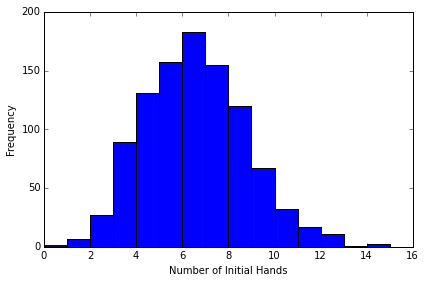

In [139]:
#グラフ描画　どっちかだけ
plt.hist(x1, label='1 in Deck', bins=max(x1))
#plt.hist(x2, label='2 in Deck', range=(0,max(x2)),bins=max(x2))
#plt.legend()

#plt.title("Growing Number of Duellists on Duel Links")
plt.xlabel("Number of Initial Hands")
plt.ylabel("Frequency")
plt.tight_layout()

# HTMLに埋め込むためにファイル出力
#plt.savefig('./1inDeck.png')
#plt.savefig('./2inDeck.png')

(array([    1.,     8.,    35.,   124.,   255.,   412.,   595.,   750.,
          870.,   937.,   969.,   986.,   997.,   998.,  1000.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.]),
 <a list of 15 Patch objects>)

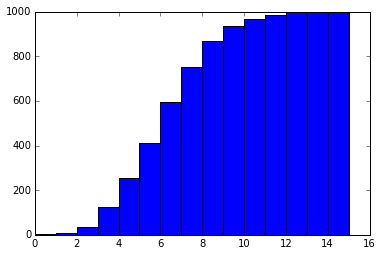

In [110]:
plt.hist(x1, label='1 in Deck',range=(0,max(x1)), bins=max(x1), cumulative=True)
#plt.hist(x2, label='2 in Deck',range=(0,21), bins=max(x2), cumulative=True)

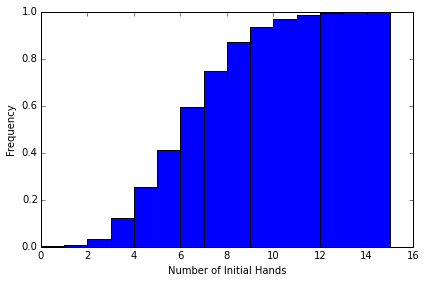

In [138]:
#グラフ描画　どっちかだけで累積
plt.hist(x1, label='1 in Deck',range=(0,max(x1)), bins=(max(x1)), cumulative=True, normed=True)
#plt.hist(x2, label='2 in Deck',range=(0,max(x2)), bins=max(x2), cumulative=True, normed=True)
#plt.legend()

#plt.title("Growing Number of Duellists on Duel Links")
plt.xlabel("Number of Initial Hands")
plt.ylabel("Frequency")
plt.tight_layout()

# HTMLに埋め込むためにファイル出力
#plt.savefig('./1inDeck_c.png')
#plt.savefig('./2inDeck_c.png')

In [164]:
#誤差e，信頼度tで確率pの推定？するのに必要な標本数
e=0.05 #誤差
#t=1.96 #信頼度95%
t=1.645
p=0.2
nSample=pow((t/e),2)*p*(1-p)
print(nSample)

#信頼区間？
I=p+t*np.sqrt(p*(1-p)/nSample)
print(I)
I=p-t*np.sqrt(p*(1-p)/nSample)
print(I)

#カイ二乗検定
file = 'duel_result.csv'

df = pd.read_csv(file, encoding='Shift_JIS')
#print(df)
df = df[df['デッキに入れた枚数']==1]
print(df)

nar=np.array(df['初期手札に入った回数'])
print(nar)
print(len(nar))

#期待値の配列
E=np.ones(len(nar))*p1*n
print(E)
#print(p1*n)

#カイ二乗の計算
X2=np.sum(pow((E-nar),2)/E)
print(X2)
    

173.1856
0.25
0.15
    デッキに入れた枚数  初期手札に入った回数
0           1           9
1           1           9
2           1          11
3           1           7
5           1           7
6           1           8
7           1           4
8           1           6
9           1           8
12          1           2
13          1           4
14          1           6
15          1           6
16          1           6
[ 9  9 11  7  7  8  4  6  8  2  4  6  6  6]
14
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
12.8333333333
